In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
def accuracy_vs_coverage(results, prediction_col, target_col, prediction_probability_column, nsamples = 50):
    new_results = results[["user_id", "item_id",target_col, prediction_col, prediction_probability_column]].sort_values(prediction_probability_column)
    records = results.shape[0]
    partition_size = int(np.ceil(records/nsamples))
    acc_vs_coverage = []
    for i in range(1,nsamples+1):
        split_size = min(i*partition_size, records)
        data_for_accuracy = new_results.tail(split_size)
        acc_vs_coverage.append({
            "coverage": split_size/records,
            "accuracy": (data_for_accuracy[target_col]==data_for_accuracy[prediction_col]).mean()
        })
    return acc_vs_coverage

In [5]:
hierarchical = "results/full_model_results_categorical_w=0_predict=sampled.csv"
hierarchical_expected = "results/full_model_results_w=0_predict=expected.csv"
baseline = "results/baseline_results_teston_renttherunway-test-stratified-tsize=0.1-rand=2022_trainon_renttherunway-train-stratified-tsize=0.1-rand=2022.csv"

In [6]:
results = pd.read_csv(hierarchical)
acc_vs_coverage_hierarchical = accuracy_vs_coverage(results, "predicted_size_fit", "size", "predicted_prob_fit")

In [12]:
results = pd.read_csv(hierarchical)
acc_vs_coverage_hierarchical_categorical = accuracy_vs_coverage(results, "predicted_size_fit", "size", "predicted_categorical_prob_fit")

In [7]:
results = pd.read_csv(hierarchical)
acc_vs_coverage_hierarchical_pair = accuracy_vs_coverage(results, "predicted_pair_size", "size", "predicted_pair_prob")

In [11]:
results = pd.read_csv(hierarchical)
acc_vs_coverage_hierarchical_categorical_pair = accuracy_vs_coverage(results, "predicted_pair_size", "size", "predicted_pair_categorical_prob")

In [8]:
results = pd.read_csv(hierarchical_expected)
acc_vs_coverage_hierarchical_expected = accuracy_vs_coverage(results, "predicted_size_fit", "size", "predicted_prob_fit")

In [9]:
results = pd.read_csv(baseline)
acc_vs_coverage_baseline = accuracy_vs_coverage(results, "predicted_size", "size", "predicted_size_prob")

In [25]:
results = pd.read_csv(baseline)
print(results.columns)
acc_vs_coverage_baseline_full = accuracy_vs_coverage(results, "predicted_size", "size", "full_predicted_prob")

Index(['Unnamed: 0', 'result_original', 'user_id_original', 'item_id_original',
       'size', 'review_date', 'category', 'user_id', 'item_id', 'result',
       'predicted_size', 'predicted_size_logprob', 'predicted_size_prob',
       'size_logprob', 'size_prob', '0', '1', '2', 'predicted_return_status',
       'predicted_return_status_prob', 'predicted_return_status_logprob',
       'return_status_prob', 'return_status_logprob', 'full_predicted_prob',
       'full_predicted_logprob', 'full_prob', 'full_logprob'],
      dtype='object')


<AxesSubplot:xlabel='coverage', ylabel='accuracy'>

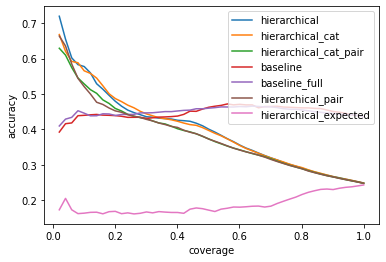

In [26]:
sns.lineplot(data=pd.DataFrame(acc_vs_coverage_hierarchical), x="coverage", y="accuracy", label="hierarchical")
sns.lineplot(data=pd.DataFrame(acc_vs_coverage_hierarchical_categorical), x="coverage", y="accuracy", label="hierarchical_cat")
sns.lineplot(data=pd.DataFrame(acc_vs_coverage_hierarchical_categorical_pair), x="coverage", y="accuracy", label="hierarchical_cat_pair")

sns.lineplot(data=pd.DataFrame(acc_vs_coverage_baseline), x="coverage", y="accuracy", label="baseline")
sns.lineplot(data=pd.DataFrame(acc_vs_coverage_baseline_full), x="coverage", y="accuracy", label="baseline_full")

sns.lineplot(data=pd.DataFrame(acc_vs_coverage_hierarchical_pair), x="coverage", y="accuracy", label="hierarchical_pair")
sns.lineplot(data=pd.DataFrame(acc_vs_coverage_hierarchical_expected), x="coverage", y="accuracy", label="hierarchical_expected")


<AxesSubplot:xlabel='coverage', ylabel='accuracy'>

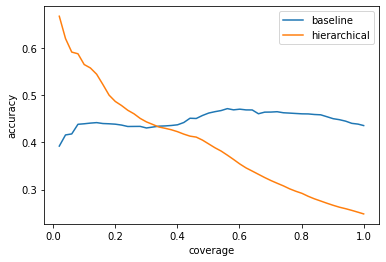

In [22]:
sns.lineplot(data=pd.DataFrame(acc_vs_coverage_baseline), x="coverage", y="accuracy", label="baseline")
sns.lineplot(data=pd.DataFrame(acc_vs_coverage_hierarchical_categorical), x="coverage", y="accuracy", label="hierarchical")

<AxesSubplot:xlabel='coverage', ylabel='accuracy'>

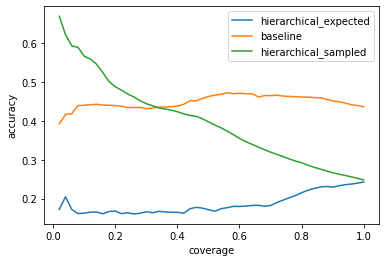

In [21]:
sns.lineplot(data=pd.DataFrame(acc_vs_coverage_hierarchical_expected), x="coverage", y="accuracy", label="hierarchical_expected")
sns.lineplot(data=pd.DataFrame(acc_vs_coverage_baseline), x="coverage", y="accuracy", label="baseline")
sns.lineplot(data=pd.DataFrame(acc_vs_coverage_hierarchical_categorical), x="coverage", y="accuracy", label="hierarchical_sampled")
